In [1]:
import scanpy as sc
import pandas as pd

In [2]:
# scanpy plotting settings
sc.settings.figdir = "./figures_mesenchymal"
sc.set_figure_params(dpi_save=300)

In [3]:
#adata = sc.read_h5ad("h5ad/scvi/xenium5k_scVI_annotated_mesenchymal.h5ad")
adata = sc.read_h5ad("h5ad/scvi/xenium5k_scVI_CellCharter_clustImmune.h5ad")  # latest global object

In [4]:
adata.obs.megagut_lvl1_majority_voting.value_counts()

megagut_lvl1_majority_voting
Mesenchymal       218216
B and B plasma    111604
T and NK cells    107029
Epithelial         63718
Myeloid            60678
Endothelial        45692
Neural             39184
Name: count, dtype: int64

In [5]:
adata_mesen = adata[adata.obs.megagut_lvl1_majority_voting == "Mesenchymal"]

In [6]:
adata_mesen

View of AnnData object with n_obs × n_vars = 218216 × 5001
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'sample', 'graphclust', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'leiden', 'megagut_lvl3_predicted_labels', 'megagut_lvl3_over_clustering', 'megagut_lvl3_majority_voting', 'megagut_lvl3_conf_score', 'megagut_lvl1_predicted_labels', 'megagut_lvl1_over_clustering', 'megagut_lvl1_majority_voting', 'megagut_lvl1_conf_score', 'fibro_predicted_labels', 'fibro_over_clustering', 'fibro_majority_voting', 'fibro_conf_score', 'MF1_prob', 'MF2_prob', 'PC_prob', 'S1_prob', 'S2_prob', 'S3_prob', '

In [7]:
adata_mesen.obs.annot.value_counts()

annot
SMC_PPLP2                     45725
Enterocyte                    28451
SMC_CAPN3                     23440
S3_crypt                      14636
S3_oral_mucosa-like           12090
S3_lamina propria              7801
Myofibroblast_1                7654
S4                             7532
Pericyte_1                     7467
Pericyte_2                     6786
vSMC                           6402
Tnaive/cm_CD4                  6318
S3x_1                          5907
S5                             4942
S3x_2                          4890
Myofibroblast-SMC              4545
S1_2                           4377
Villus fibroblast_F3           3632
S3_EGR3                        2583
Myofibroblast_2                2581
nan                            2207
S1_1                           1908
S2                             1739
SMC_ANO1                       1435
B_memory                        998
S3_intermediate                 772
Myofibroblast_3                 493
Treg_IL10             

In [8]:
exclude = ["Trm_CD8", "Mesoderm_2", "Trm_CD4", "EC_lymphatic", "Glial/Enteric_neural_crest", "EC_capillary", "Treg_IL10", "B_memory", "nan", "Tnaive/cm_CD4", "Enterocyte", "nan"]

In [9]:
adata_mesen = adata_mesen[~adata_mesen.obs.annot.isin(exclude)]

In [10]:
adata_mesen.obs.annot.value_counts()

annot
SMC_PPLP2               45725
SMC_CAPN3               23440
S3_crypt                14636
S3_oral_mucosa-like     12090
S3_lamina propria        7801
Myofibroblast_1          7654
S4                       7532
Pericyte_1               7467
Pericyte_2               6786
vSMC                     6402
S3x_1                    5907
S5                       4942
S3x_2                    4890
Myofibroblast-SMC        4545
S1_2                     4377
Villus fibroblast_F3     3632
S3_EGR3                  2583
Myofibroblast_2          2581
S1_1                     1908
S2                       1739
SMC_ANO1                 1435
S3_intermediate           772
Myofibroblast_3           493
Name: count, dtype: int64

In [11]:
adata_mesen.obs.annot = adata_mesen.obs.annot.astype(str)

/home/jovyan/my-conda-envs/img/lib/python3.10/site-packages/pandas/core/generic.py:6234: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self[name] = value


In [12]:
# adata_mesen.obs.annot[adata_mesen.obs.annot == 'S1_1'] = 'S1'
# adata_mesen.obs.annot[adata_mesen.obs.annot == 'S1_2'] = 'S1'

In [13]:
adata_mesen.obs.loc[adata_mesen.obs.annot == 'S1_1', 'annot'] = 'S1'
adata_mesen.obs.loc[adata_mesen.obs.annot == 'S1_2', 'annot'] = 'S1'

In [14]:
# Exclude 
adata_mesen = adata_mesen[~(adata_mesen.obs.annot == 'SMC_ANO1')]

In [15]:
adata_mesen.obs.annot = adata_mesen.obs.annot.astype('category')

/home/jovyan/my-conda-envs/img/lib/python3.10/site-packages/pandas/core/generic.py:6234: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self[name] = value


In [16]:
adata_mesen.obs.annot[adata_mesen.obs.annot == 'nan'] = pd.NA
adata_mesen.obs.annot = adata_mesen.obs.annot.cat.remove_categories('nan')

In [17]:
markers = [
    "PDGFRA",
    "MYLK",
    
    "PCDH10",
    "GREM1",
    "GREM2",
    "CCN1",
    "CCN2",
    "CCL19",
    "THY1",
    "MCAM",
    "ADAMDEC1",
    "SOX2-OT",
    "PDGFRB",
    "EGR3",
    "SOCS3",
    "SOX6",
    "NR4A1",
    "SLIT2",
    "CA12",
    "CCL19",
    "COL7A1",
    "MCAM",
    "DPT",
    "CXCL12",
    "MYLK",
    "CAPN3",
#        "PPLP2",
    "CCL8",
    "CCL11",
    "CCL13",
    "PDGFD",
    "F2R",
    "RGS5",
    "NOTCH3",
    "CD36",
    "SOSTDC1",
    "PDGFC",
    "ACTN1",
    "MYH9",
    "MYH10",
    "MMP13",
    "CXCL5",
    "CXCL6",
    "FAP",
    "PDPN",
    "CXCL13",
    "CCDC80",
    "IGF1",
    "MFAP5",
    "PI16",
    "CD34",
    "CD248",
    "CD55"]

In [18]:
marker_dict = {
    "Fibroblast": "PDGFRA",
    "Contractile": "MYLK",
    "Inflammatory": ["CXCL5", "CXCL6", "FAP", "PDPN"],
    "FRC": "CCL19",
    "Universal progenitor": ["MFAP5", "PI16", "CD34", "CD248", "CD55"],
    "Rest": [
        "PCDH10",
        "GREM1",
        "GREM2",
        "CCN1",
        "CCN2",
        "THY1",
        "MCAM",
        "ADAMDEC1",
        "SOX2-OT",
        "PDGFRB",
        "EGR3",
        "SOCS3",
        "SOX6",
        "NR4A1",
        "SLIT2",
        "CA12",
        "COL7A1",
        "MCAM",
        "DPT",
        "CXCL12",
        "CAPN3",
    #        "PPLP2",
        "CCL8",
        "CCL11",
        "CCL13",
        "PDGFD",
        "F2R",
        "RGS5",
        "NOTCH3",
        "CD36",
        "SOSTDC1",
        "PDGFC",
        "ACTN1",
        "MYH9",
        "MYH10",
        "MMP13",
        "CXCL13",
        "CCDC80",
        "IGF1",
    ]
}

In [19]:
sc.tl.dendrogram(adata_mesen, groupby='annot')

/home/jovyan/my-conda-envs/img/lib/python3.10/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()


In [20]:
adata_mesen.uns['dendrogram_annot']['categories_ordered']

['Villus fibroblast_F3',
 'SMC_CAPN3',
 'SMC_PPLP2',
 'Myofibroblast_3',
 'Myofibroblast_2',
 'Myofibroblast-SMC',
 'Myofibroblast_1',
 'vSMC',
 'Pericyte_1',
 'Pericyte_2',
 'S3_crypt',
 'S3_intermediate',
 'S3x_2',
 'S3x_1',
 'S3_EGR3',
 'S3_lamina propria',
 'S4',
 'S3_oral_mucosa-like',
 'S5',
 'S1',
 'S2']

In [21]:
#adata_mesen

categories: Myofibroblast-SMC, Myofibroblast_1, Myofibroblast_2, etc.
var_group_labels: Fibroblast, Contractile, Inflammatory, etc.


/home/jovyan/my-conda-envs/img/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/img/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()


/home/jovyan/my-conda-envs/img/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


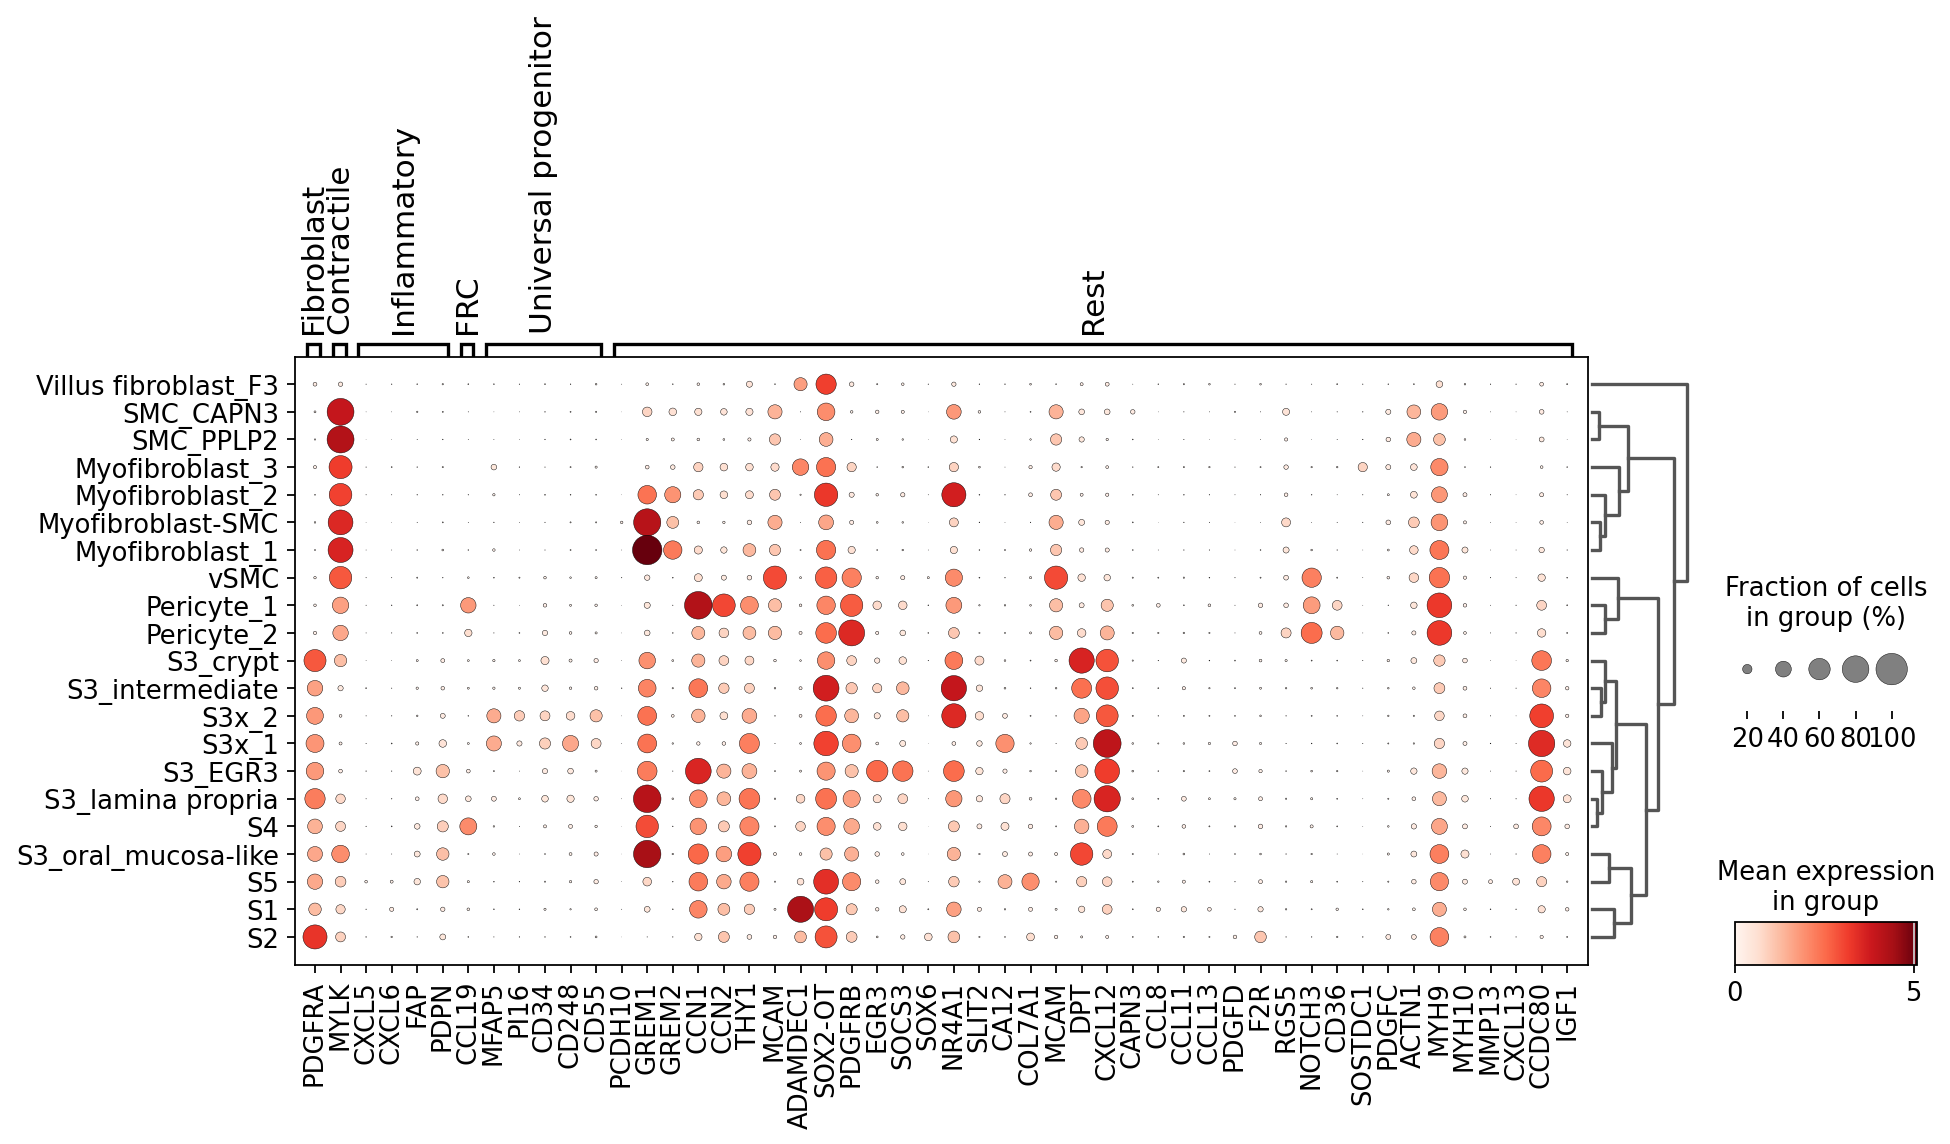

In [22]:
sc.pl.dotplot(
    adata_mesen,
    var_names=marker_dict,
    groupby="annot",
#    categories_to_plot='leiden10',
    dendrogram=True,
    figsize=(13, 5),
    save="xenium5k_v2_mesenchymal_annot.pdf"
)

In [23]:
import altair as alt
import pandas as pd

# Load data from Matthias
df = pd.read_csv("tables/mesenchymal_wilcoxon_vsRest_mf annotated.csv")
df = df[0:24]

# Format data
df = df[['predicted label', 'pathology association', 'nomenclature I', 'nomenclature II', 'nomenclature III']]

# Fix some typos
df['pathology association'] = df['pathology association'].replace({'homeostatic': 'homeostasis', '?': pd.NA})

# Exclude rows and relabel to S1
df = df[~df['predicted label'].isin(['S1_2', 'S3_GATA2', 'SMC_ANO1'])]
df['predicted label'] = df['predicted label'].replace({'S1_1': 'S1'})

df_long = df.melt(id_vars='predicted label', var_name='annotation', value_name='Category')
df_long

,predicted label,annotation,Category
0,Myofibroblast-SMC,pathology association,homeostasis
1,Myofibroblast_1,pathology association,CD
2,Myofibroblast_2,pathology association,homeostasis
3,Myofibroblast_3,pathology association,homeostasis
4,Pericyte_1,pathology association,CD
...,...,...,...
79,S3_oral_mucosa-like,nomenclature III,fibrosis
80,S3_crypt,nomenclature III,NaN
81,S3_lamina propria,nomenclature III,NaN
82,SMC_CAPN3,nomenclature III,NaN


In [24]:
# One chart per nomenclature column, each filtered:
annotations = df_long['annotation'].unique()

scanpy_order = adata_mesen.uns['dendrogram_annot']['categories_ordered']

layers = []
for col in annotations:
    chart = (alt.Chart(df_long[df_long['annotation'] == col])
             .mark_rect()
             .encode(
                 x=alt.X('annotation:N', title=''),
                 y=alt.Y('predicted label:N',
                         sort=scanpy_order),
                 color=alt.Color('Category:N', legend=alt.Legend(title=col), scale=alt.Scale(scheme='category20'))
             ))
    layers.append(chart)

final_chart = alt.layer(*layers).resolve_scale(color='independent')

final_chart.properties(width=60, height=300).save("figures_mesenchymal/dotplot_xenium5k_v2_mesenchymal_labels.pdf")
final_chart

alt.LayerChart(...)

In [25]:
# Exclude 
adata_mesen = adata_mesen[~(adata_mesen.obs.annot == 'Villus fibroblast_F3')]

df = df[~df['predicted label'].isin(['Villus fibroblast_F3'])]

df_long = df.melt(id_vars='predicted label', var_name='annotation', value_name='Category')

In [26]:
sc.tl.dendrogram(adata_mesen, groupby='annot')

/home/jovyan/my-conda-envs/img/lib/python3.10/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()
/home/jovyan/my-conda-envs/img/lib/python3.10/site-packages/scanpy/tools/_dendrogram.py:163: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = dat


In [27]:
adata_mesen.obs.annot.value_counts()

annot
SMC_PPLP2              45725
SMC_CAPN3              23440
S3_crypt               14636
S3_oral_mucosa-like    12090
S3_lamina propria       7801
Myofibroblast_1         7654
S4                      7532
Pericyte_1              7467
Pericyte_2              6786
vSMC                    6402
S1                      6285
S3x_1                   5907
S5                      4942
S3x_2                   4890
Myofibroblast-SMC       4545
S3_EGR3                 2583
Myofibroblast_2         2581
S2                      1739
S3_intermediate          772
Myofibroblast_3          493
Name: count, dtype: int64

/home/jovyan/my-conda-envs/img/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/img/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/img/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **k

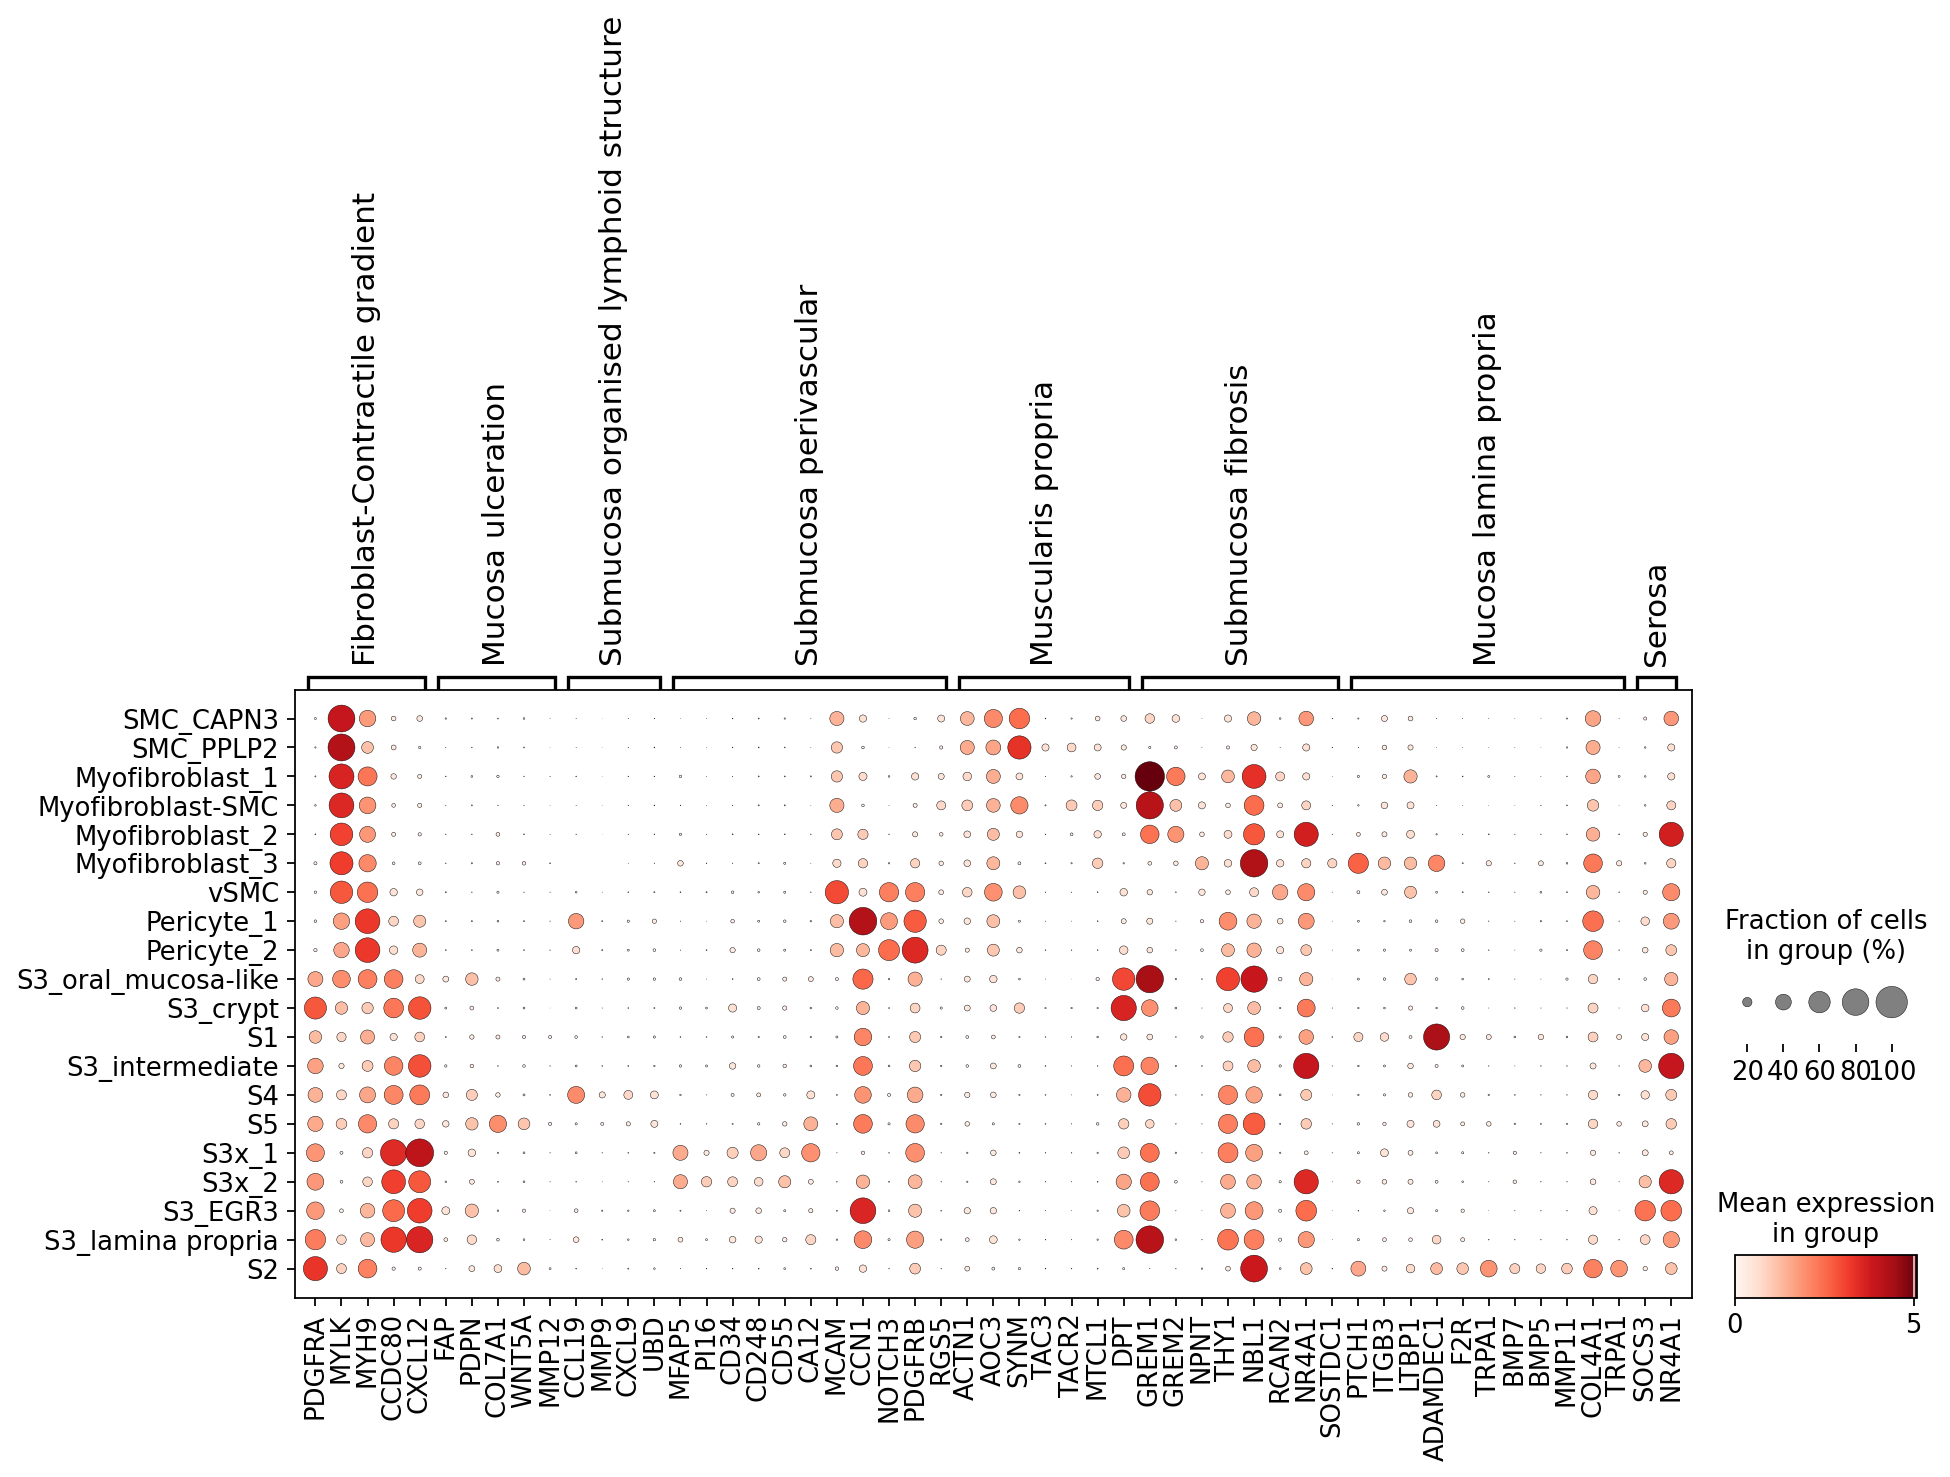

In [28]:
# marker_dict = {
#     "Fibroblast-Contractile gradient": ["PDGFRA", "MYLK", "CCDC80", "MYH9", "CXCL12"],
#     "Mucosa ulceration": ["FAP", "PDPN", "COL7A1", "WNT5A", "MMP12"],
#     "Submucosa organised lymphoid structure": ["CCL19", "MMP9", "CXCL9", "IL33", "UBD", "ETV6"],
#     "Submucosa perivascular": ["MFAP5", "PI16", "CD34", "CD248", "CD55", "CA12", "MCAM", "CCN1", "NOTCH3", "PDGFRB", "RGS5"],
#     "Muscularis propria": ["SOX11", "ACTN1", "AOC3", "SYNM", "TAC3", "WNT5B", "TACR2", "TSPAN12", "MTCL1", "DPT"],
#     "Submucosa fibrosis": ["PITX1", "GREM1", "GREM2", "NPNT", "RSPO2", "THY1", "NBL1", "RCAN2", "NR4A1", "SOSTDC1"], 
#     "Mucosa lamina propria": ["PTCH1", "ITGB3", "LTBP1", "ADAMDEC1", "F2R", "TRPA1", "BMP7", "BMP5", "MMP11", "COL4A1", "CCL24", "TRPA1", "CD209"],
#     "Serosa": ["SOCS3","NR4A1"]
# }

marker_dict = {
    "Fibroblast-Contractile gradient": ["PDGFRA", "MYLK", "MYH9", "CCDC80", "CXCL12"],
    "Mucosa ulceration": ["FAP", "PDPN", "COL7A1", "WNT5A", "MMP12"],
    "Submucosa organised lymphoid structure": ["CCL19", "MMP9", "CXCL9", "UBD"],
    "Submucosa perivascular": ["MFAP5", "PI16", "CD34", "CD248", "CD55", "CA12", "MCAM", "CCN1", "NOTCH3", "PDGFRB", "RGS5"],
    "Muscularis propria": ["ACTN1", "AOC3", "SYNM", "TAC3", "TACR2", "MTCL1", "DPT"],
    "Submucosa fibrosis": ["GREM1", "GREM2", "NPNT", "THY1", "NBL1", "RCAN2", "NR4A1", "SOSTDC1"], 
    "Mucosa lamina propria": ["PTCH1", "ITGB3", "LTBP1", "ADAMDEC1", "F2R", "TRPA1", "BMP7", "BMP5", "MMP11", "COL4A1", "TRPA1"],
    "Serosa": ["SOCS3","NR4A1"]
}

cell_order = [
    'SMC_CAPN3',
    'SMC_PPLP2',
    'Myofibroblast_1',
    'Myofibroblast-SMC',
    'Myofibroblast_2',
    'Myofibroblast_3',
    'vSMC',
    'Pericyte_1',
    'Pericyte_2',
    'S3_oral_mucosa-like',
    'S3_crypt',
    'S1',
    'S3_intermediate',
    'S4',
    'S5',
    'S3x_1',
    'S3x_2',
    'S3_EGR3',
    'S3_lamina propria',
    'S2'
]

sc.pl.dotplot(
    adata_mesen,
    var_names=marker_dict,
    groupby="annot",
 #   dendrogram=True,
    categories_order=cell_order,
    figsize=(13, 5),
    save="xenium5k_v4_mesenchymal_annot.pdf"
)

In [29]:
# One chart per nomenclature column, each filtered:
annotations = df_long['annotation'].unique()

#scanpy_order = adata_mesen.uns['dendrogram_annot']['categories_ordered']

layers = []
for col in annotations:
    chart = (alt.Chart(df_long[df_long['annotation'] == col])
             .mark_rect()
             .encode(
                 x=alt.X('annotation:N', title=''),
                 y=alt.Y('predicted label:N',
                         sort=cell_order),
                 color=alt.Color('Category:N', legend=alt.Legend(title=col), scale=alt.Scale(scheme='category20'))
             ))
    layers.append(chart)

final_chart = alt.layer(*layers).resolve_scale(color='independent')

width = 50; height = 260
final_chart.properties(width=width, height=height).save("figures_mesenchymal/dotplot_xenium5k_v3_mesenchymal_labels.pdf")
final_chart.properties(width=width, height=height)

alt.LayerChart(...)

categories: Myofibroblast-SMC, Myofibroblast_1, Myofibroblast_2, etc.
var_group_labels: Fibroblast-Contractile gradient, Mucosa ulceration, Submucosa organised lymphoid structure, etc.


/home/jovyan/my-conda-envs/img/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/img/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()


/home/jovyan/my-conda-envs/img/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


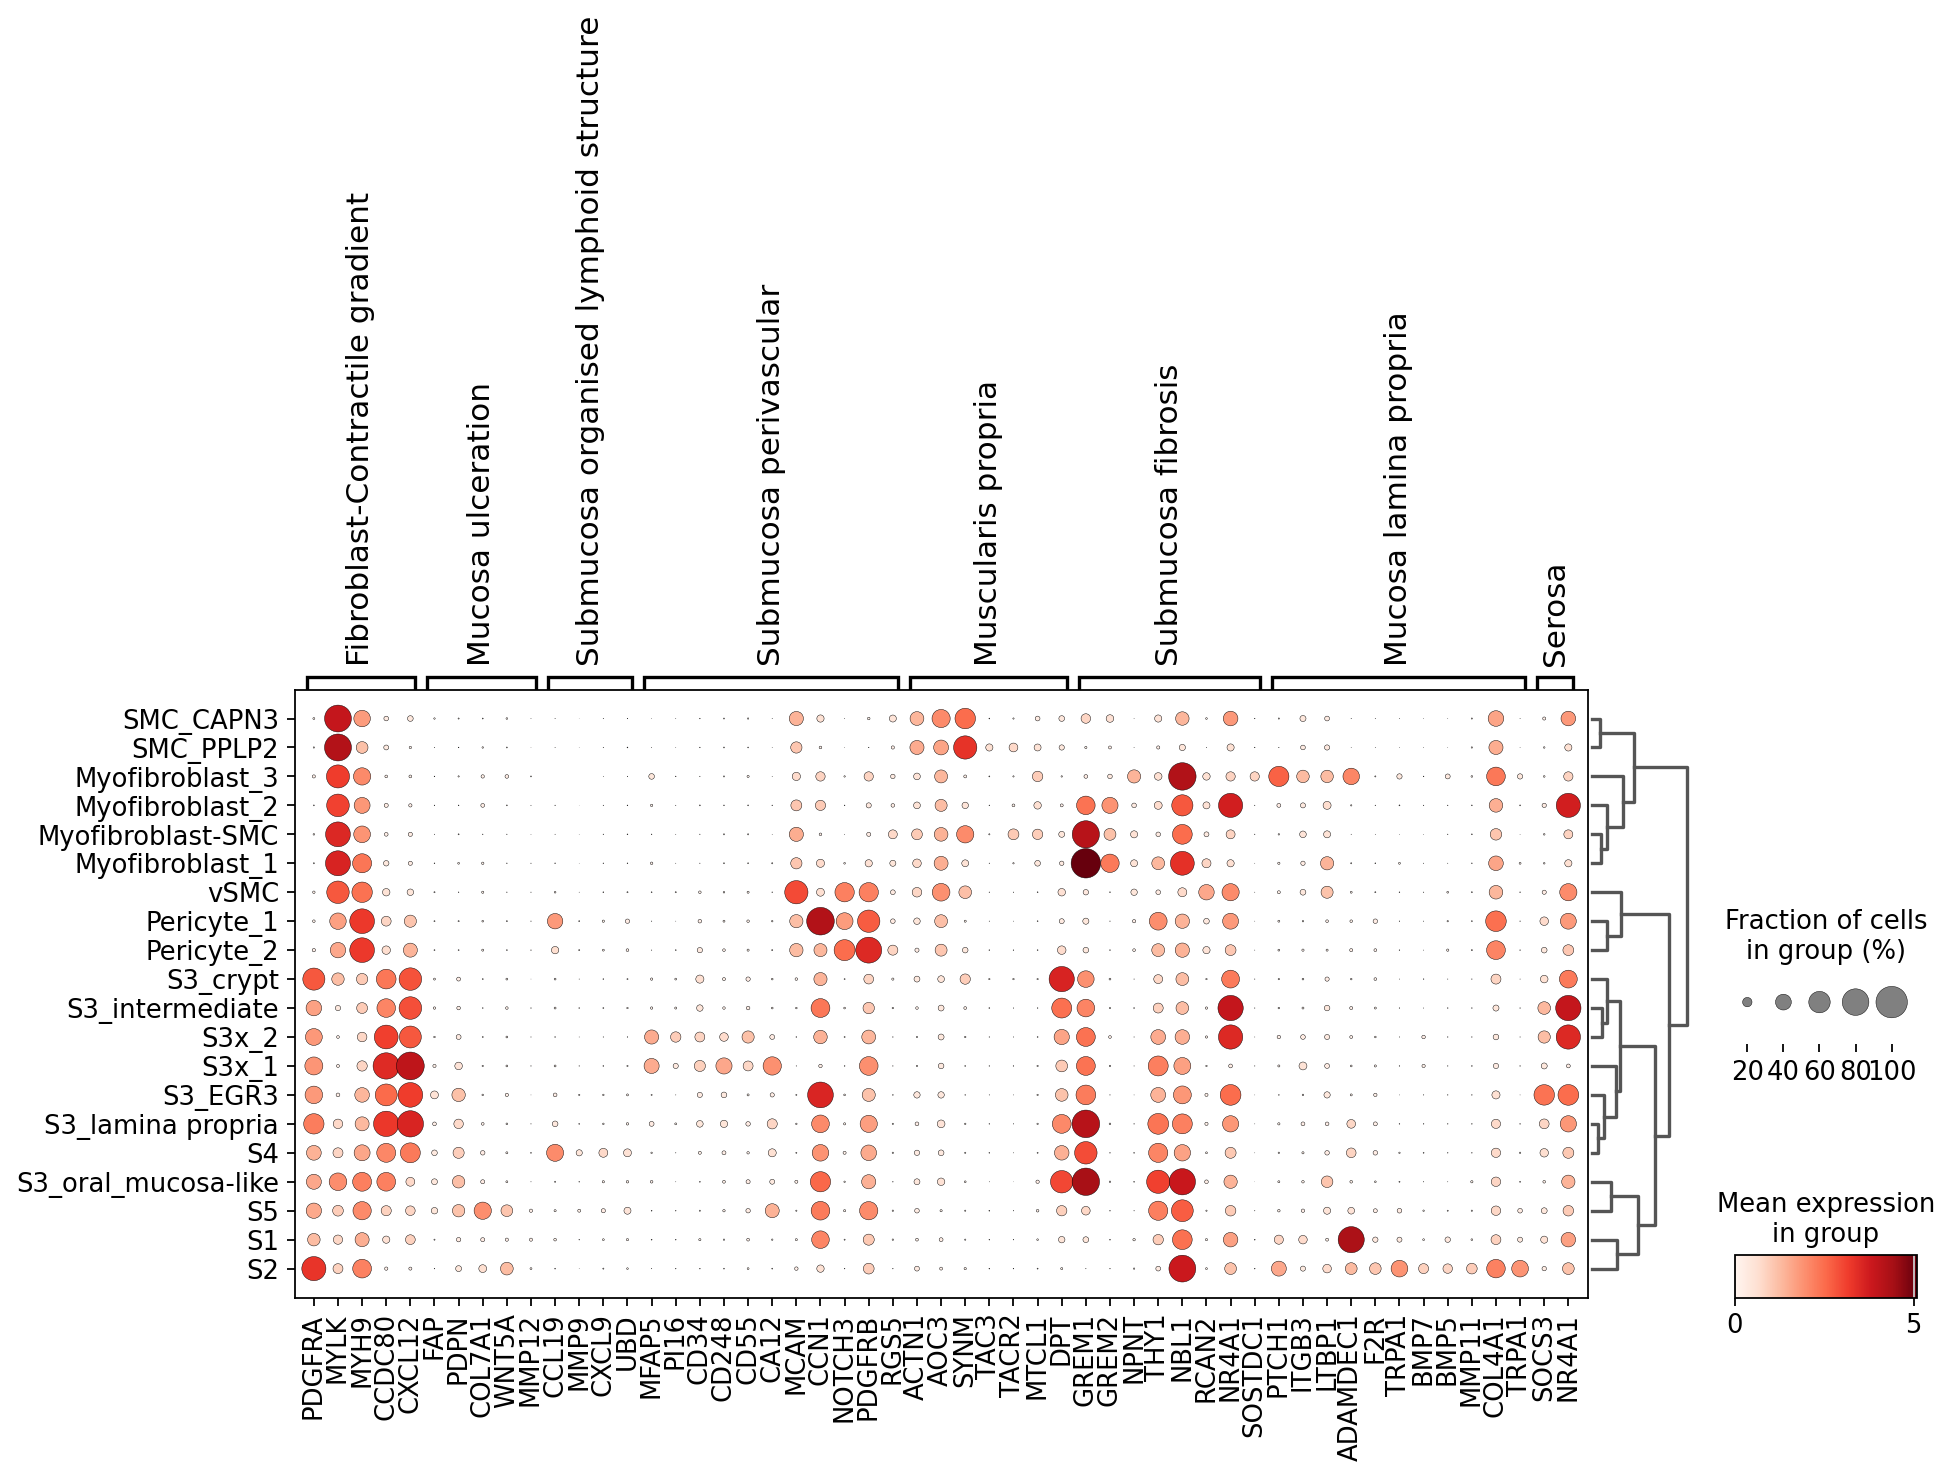

In [30]:
sc.pl.dotplot(
    adata_mesen,
    var_names=marker_dict,
    groupby="annot",
    dendrogram=True,
    categories_order=cell_order,
    figsize=(13, 5),
    save="xenium5k_v5_mesenchymal_annot.pdf"
)

In [63]:
# scRNA-seq markers
marker_dict = {
    'S1': ['CCL11', 'CCL8', 'CCL13', 'ADAMDEC1', #'ABCA8'
          ],
    'S2': ['PDGFRA', 'SOX6', #'F3',
           'PDGFD', 'F2R'],
    'S3': ['CCDC80', 'IGF1',  #'C7', 'FBLN1',
           'DPT'],
    'S3x': ['MFAP5', 'PI16', 'CD34', 'CD248', 'CD55'],
    'S4': ['CCL19', #'CCL21', 'CD74',
           'CXCL13', #'FDCSP'
          ],
    'S5': [#'MMP1', 
           'CXCL5', 'CXCL6', 'FAP', 'PDPN'],
    'MF1': [
        #'HHIP',
        #'MYOCD',
        'PDGFC',  'SOSTDC1', #'ACTA2'
    ],
    'MF2': [
        #'ACTG2', 'MYH11', 'CNN1', 'DES',
            'GREM1'],
    'PC': ['PDGFRB', 'RGS5', 'MCAM', 'NOTCH3', 'CD36']
}

/home/jovyan/my-conda-envs/img/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/img/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/img/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **k

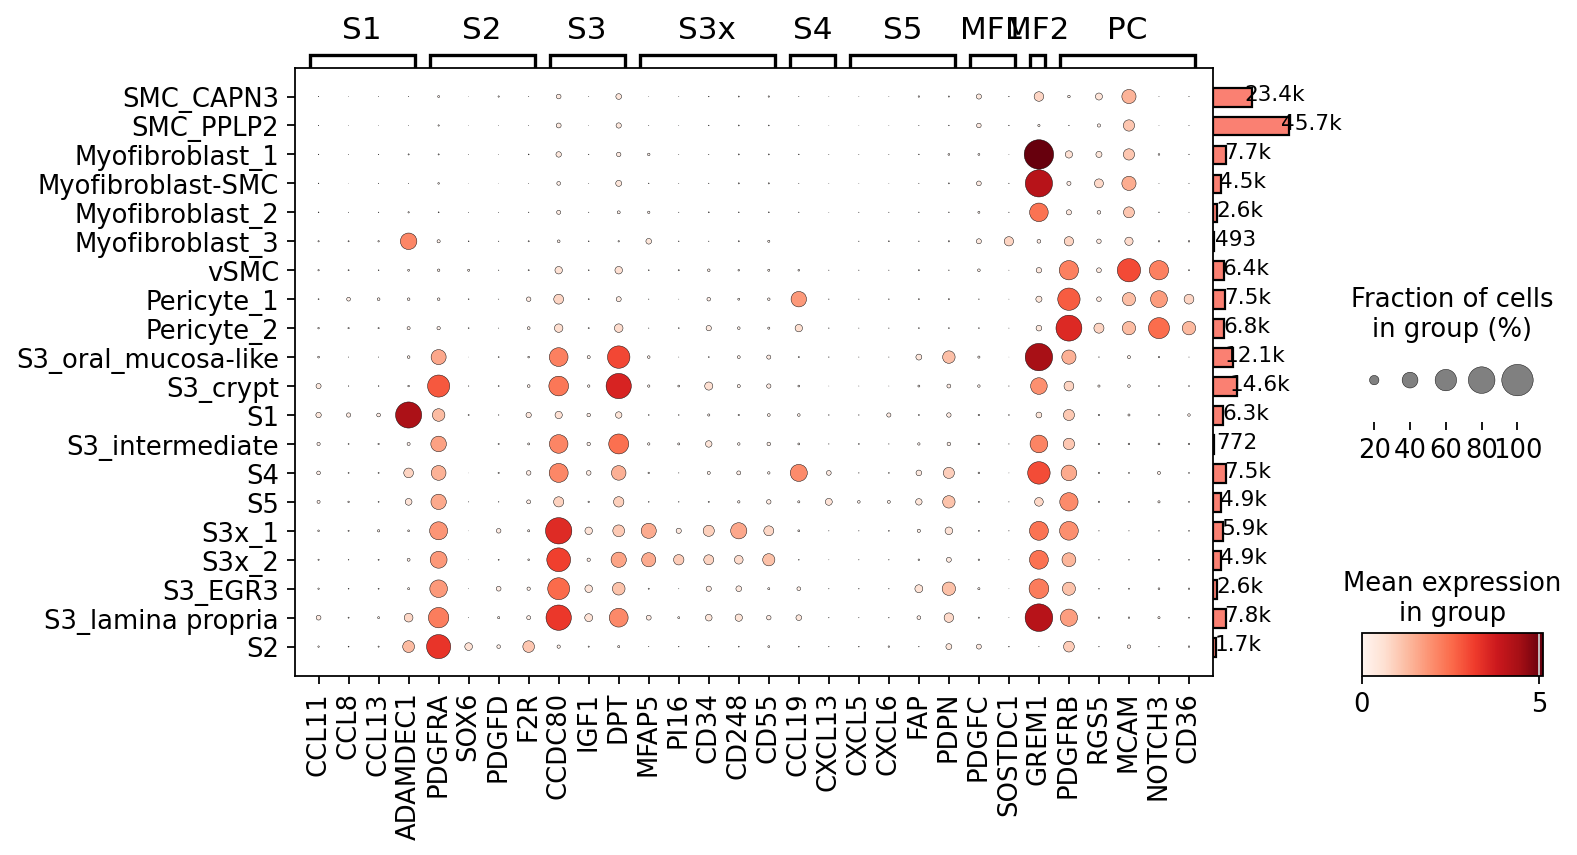

In [69]:
plot = sc.pl.dotplot(
    adata_mesen,
    var_names=marker_dict,
    groupby="annot",
    #dendrogram=True,
    categories_order=cell_order,
    figsize=(10, 5),
    return_fig=True,
    #save="xenium5k_v5_mesenchymal_annot_suspension_markers.pdf"
)

plot.add_totals()
plot.savefig("figures_mesenchymal/xenium5k_v5_mesenchymal_annot_suspension_markers.pdf")